In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv',sep=',')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df=df.drop(['Name','PassengerId','Cabin','Ticket'],axis=1)

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
from sklearn.impute import SimpleImputer

In [10]:
mean_imputer=SimpleImputer(strategy='mean')

In [11]:
df['Age']=mean_imputer.fit_transform(df[['Age']])

In [12]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [13]:
md_imputer=SimpleImputer(strategy='most_frequent')

In [14]:
df['Embarked']=md_imputer.fit_transform(df[['Embarked']])

In [15]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [16]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
bins=np.arange(0,82,10)

In [18]:
df['AgeBucket']=pd.cut(df.Age,bins=bins)

In [19]:
df=pd.get_dummies(df,columns=['Pclass','Sex','Embarked','AgeBucket'])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Embarked_Q,Embarked_S,"AgeBucket_(0, 10]","AgeBucket_(10, 20]","AgeBucket_(20, 30]","AgeBucket_(30, 40]","AgeBucket_(40, 50]","AgeBucket_(50, 60]","AgeBucket_(60, 70]","AgeBucket_(70, 80]"
0,0,22.000000,1,0,7.2500,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0
1,1,38.000000,1,0,71.2833,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
3,1,35.000000,1,0,53.1000,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0,35.000000,0,0,8.0500,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
887,1,19.000000,0,0,30.0000,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
888,0,29.699118,1,2,23.4500,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
889,1,26.000000,0,0,30.0000,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [22]:
df.shape

(891, 21)

In [23]:
y=df.Survived

In [24]:
x=df.drop('Survived',axis=1)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
x_train

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,"AgeBucket_(0, 10]","AgeBucket_(10, 20]","AgeBucket_(20, 30]","AgeBucket_(30, 40]","AgeBucket_(40, 50]","AgeBucket_(50, 60]","AgeBucket_(60, 70]","AgeBucket_(70, 80]"
50,7.0,4,1,39.6875,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0
421,21.0,0,0,7.7333,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
194,44.0,0,0,27.7208,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
117,29.0,1,0,21.0000,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
307,17.0,1,0,108.9000,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,20.0,1,0,9.8250,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0
767,30.5,0,0,7.7500,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0
212,22.0,0,0,7.2500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0
261,3.0,4,2,31.3875,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0


In [27]:
x_train.shape

(712, 20)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [29]:
x_train

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,"AgeBucket_(0, 10]","AgeBucket_(10, 20]","AgeBucket_(20, 30]","AgeBucket_(30, 40]","AgeBucket_(40, 50]","AgeBucket_(50, 60]","AgeBucket_(60, 70]","AgeBucket_(70, 80]"
140,29.699118,0,2,15.2458,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0
439,31.000000,0,0,10.5000,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
817,31.000000,1,1,37.0042,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0
378,20.000000,0,0,4.0125,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0
491,21.000000,0,0,7.2500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,39.000000,1,1,83.1583,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
192,19.000000,1,0,7.8542,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0
629,29.699118,0,0,7.7333,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
559,36.000000,1,0,17.4000,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0


In [30]:
x_train.shape

(712, 20)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()
scaler.fit(x_train)


StandardScaler()

In [33]:
scaler.mean_

array([2.97360612e+01, 5.29494382e-01, 3.91853933e-01, 3.18629499e+01,
       2.38764045e-01, 2.05056180e-01, 5.56179775e-01, 3.46910112e-01,
       6.53089888e-01, 1.81179775e-01, 8.98876404e-02, 7.28932584e-01,
       7.44382022e-02, 1.25000000e-01, 4.50842697e-01, 1.81179775e-01,
       9.97191011e-02, 4.35393258e-02, 1.82584270e-02, 7.02247191e-03])

In [34]:
scaler.var_

array([1.71093609e+02, 1.29969188e+00, 6.73697687e-01, 2.51001900e+03,
       1.81755776e-01, 1.63008143e-01, 2.46843833e-01, 2.26563486e-01,
       2.26563486e-01, 1.48353664e-01, 8.18078525e-02, 1.97589872e-01,
       6.88971563e-02, 1.09375000e-01, 2.47583560e-01, 1.48353664e-01,
       8.97752020e-02, 4.16436529e-02, 1.79250568e-02, 6.97315680e-03])

In [35]:
x_train=scaler.transform(x_train)

In [36]:
x_train

array([[-2.82437263e-03, -4.64452339e-01,  1.95926403e+00, ...,
        -2.13357194e-01, -1.36374474e-01, -8.40959915e-02],
       [ 9.66293694e-02, -4.64452339e-01, -4.77410187e-01, ...,
        -2.13357194e-01, -1.36374474e-01, -8.40959915e-02],
       [ 9.66293694e-02,  4.12709638e-01,  7.40926921e-01, ...,
        -2.13357194e-01, -1.36374474e-01, -8.40959915e-02],
       ...,
       [-2.82437263e-03, -4.64452339e-01, -4.77410187e-01, ...,
        -2.13357194e-01, -1.36374474e-01, -8.40959915e-02],
       [ 4.78884313e-01,  4.12709638e-01, -4.77410187e-01, ...,
        -2.13357194e-01, -1.36374474e-01, -8.40959915e-02],
       [ 2.31370804e+00,  4.12709638e-01,  7.40926921e-01, ...,
         4.68697578e+00, -1.36374474e-01, -8.40959915e-02]])

In [37]:
x_train[:,0].mean()

-4.1914037783601414e-16

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model=LogisticRegression()

In [40]:
model.fit(x_train,y_train)

LogisticRegression()

In [41]:
x_test.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'AgeBucket_(0, 10]', 'AgeBucket_(10, 20]', 'AgeBucket_(20, 30]',
       'AgeBucket_(30, 40]', 'AgeBucket_(40, 50]', 'AgeBucket_(50, 60]',
       'AgeBucket_(60, 70]', 'AgeBucket_(70, 80]'],
      dtype='object')

In [71]:
model.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 100,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 20,
 'classes_': array([0, 1], dtype=int64),
 'n_iter_': array([20]),
 'coef_': array([[-0.67509171, -0.530713  , -0.15094791,  0.11701046,  0.44750419,
          0.06048377, -0.43314998,  0.65579055, -0.65579055,  0.04652267,
          0.10160544, -0.1056898 ,  0.16253158, -0.12659773, -0.19690022,
          0.11931065,  0.08708311,  0.1120378 , -0.0450647 ,  0.09943111]]),
 'intercept_': array([-0.66117651])}

In [42]:
model.coef_

array([[-0.67509171, -0.530713  , -0.15094791,  0.11701046,  0.44750419,
         0.06048377, -0.43314998,  0.65579055, -0.65579055,  0.04652267,
         0.10160544, -0.1056898 ,  0.16253158, -0.12659773, -0.19690022,
         0.11931065,  0.08708311,  0.1120378 , -0.0450647 ,  0.09943111]])

In [43]:
list(zip(x_test.columns,model.coef_.flatten()))

[('Age', -0.6750917142129412),
 ('SibSp', -0.5307129960420128),
 ('Parch', -0.15094790762945012),
 ('Fare', 0.11701045695789974),
 ('Pclass_1', 0.4475041855645776),
 ('Pclass_2', 0.060483768148279174),
 ('Pclass_3', -0.4331499795087572),
 ('Sex_female', 0.6557905515036838),
 ('Sex_male', -0.6557905515036844),
 ('Embarked_C', 0.046522673418330315),
 ('Embarked_Q', 0.10160543745133511),
 ('Embarked_S', -0.10568980402346768),
 ('AgeBucket_(0, 10]', 0.16253157647704114),
 ('AgeBucket_(10, 20]', -0.12659772906124273),
 ('AgeBucket_(20, 30]', -0.19690022068317184),
 ('AgeBucket_(30, 40]', 0.11931065338248609),
 ('AgeBucket_(40, 50]', 0.08708311178871138),
 ('AgeBucket_(50, 60]', 0.11203780210149758),
 ('AgeBucket_(60, 70]', -0.04506469547610432),
 ('AgeBucket_(70, 80]', 0.09943110665267026)]

<BarContainer object of 20 artists>

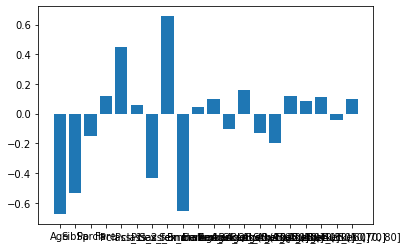

In [44]:
plt.bar(x_test.columns,model.coef_.flatten())

([<matplotlib.axis.XTick at 0x160d6cb0bb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

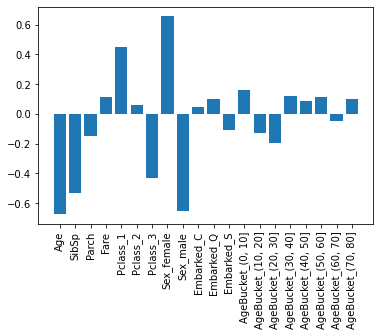

In [45]:
plt.bar(x_test.columns,model.coef_.flatten())
plt.xticks(x_test.columns,rotation=90)

In [46]:
model.intercept_

array([-0.66117651])

In [47]:
y_hat=model.predict(scaler.transform(x_test))

In [48]:
y_hat

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [49]:
y_hat.sum()

67

In [50]:
list(zip(y_hat,y_test))

[(0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 

In [51]:
model.score(scaler.transform(x_test),y_test)

0.8100558659217877

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_hat)

array([[94, 16],
       [18, 51]], dtype=int64)

In [53]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [54]:
recall_score(y_test,y_hat)

0.7391304347826086

In [55]:
precision_score(y_test,y_hat)

0.7611940298507462

In [56]:
f1_score(y_test,y_hat)

0.75

In [57]:
y_prob=model.predict_proba(scaler.transform(x_test))
y_prob

array([[0.89012733, 0.10987267],
       [0.92177625, 0.07822375],
       [0.84328363, 0.15671637],
       [0.08107257, 0.91892743],
       [0.41737297, 0.58262703],
       [0.62049212, 0.37950788],
       [0.06152101, 0.93847899],
       [0.05477399, 0.94522601],
       [0.55344347, 0.44655653],
       [0.34376236, 0.65623764],
       [0.9393816 , 0.0606184 ],
       [0.18287876, 0.81712124],
       [0.86683475, 0.13316525],
       [0.04020526, 0.95979474],
       [0.0456713 , 0.9543287 ],
       [0.24737611, 0.75262389],
       [0.89255089, 0.10744911],
       [0.81171785, 0.18828215],
       [0.88428679, 0.11571321],
       [0.44121345, 0.55878655],
       [0.69405488, 0.30594512],
       [0.05002371, 0.94997629],
       [0.86683812, 0.13316188],
       [0.62021709, 0.37978291],
       [0.33370517, 0.66629483],
       [0.08395998, 0.91604002],
       [0.86751835, 0.13248165],
       [0.33479008, 0.66520992],
       [0.1959013 , 0.8040987 ],
       [0.26572139, 0.73427861],
       [0.

In [58]:
y_prob.shape


(179, 2)

In [59]:
y_prob1=y_prob[0:,1]

In [60]:
y_prob1

array([0.10987267, 0.07822375, 0.15671637, 0.91892743, 0.58262703,
       0.37950788, 0.93847899, 0.94522601, 0.44655653, 0.65623764,
       0.0606184 , 0.81712124, 0.13316525, 0.95979474, 0.9543287 ,
       0.75262389, 0.10744911, 0.18828215, 0.11571321, 0.55878655,
       0.30594512, 0.94997629, 0.13316188, 0.37978291, 0.66629483,
       0.91604002, 0.13248165, 0.66520992, 0.8040987 , 0.73427861,
       0.17215068, 0.72229772, 0.08513946, 0.3822616 , 0.05228494,
       0.61150523, 0.07803009, 0.20578584, 0.23328684, 0.14937648,
       0.21620792, 0.13395791, 0.07940219, 0.02622453, 0.91324843,
       0.078282  , 0.078282  , 0.92285903, 0.23024593, 0.22574188,
       0.37923293, 0.52635106, 0.95427687, 0.13001764, 0.46631268,
       0.12697485, 0.10824117, 0.28746952, 0.10414916, 0.05907257,
       0.152961  , 0.40632425, 0.87642356, 0.47207112, 0.51715145,
       0.21644099, 0.87472491, 0.18514467, 0.95885269, 0.94416036,
       0.76532638, 0.23773788, 0.40366103, 0.07830799, 0.09999

In [61]:
list(zip(y_prob1,y_hat))

[(0.10987266771852693, 0),
 (0.07822374956453734, 0),
 (0.15671636811244558, 0),
 (0.9189274340874759, 1),
 (0.5826270301064295, 1),
 (0.37950787910555733, 0),
 (0.9384789934094553, 1),
 (0.9452260126265871, 1),
 (0.44655653173404414, 0),
 (0.6562376406353816, 1),
 (0.06061840310405086, 0),
 (0.8171212426300831, 1),
 (0.13316524940750893, 0),
 (0.9597947381172034, 1),
 (0.9543287026014015, 1),
 (0.7526238884888559, 1),
 (0.1074491132709344, 0),
 (0.18828214535929844, 0),
 (0.11571321019691078, 0),
 (0.5587865471646833, 1),
 (0.3059451184666259, 0),
 (0.9499762869935511, 1),
 (0.13316187949401048, 0),
 (0.37978290545635845, 0),
 (0.6662948262829221, 1),
 (0.916040018397195, 1),
 (0.13248165434144663, 0),
 (0.6652099169985048, 1),
 (0.8040987040748359, 1),
 (0.7342786102038181, 1),
 (0.17215068144465082, 0),
 (0.7222977205614592, 1),
 (0.08513945922075965, 0),
 (0.38226159932162723, 0),
 (0.05228493627723741, 0),
 (0.6115052307996921, 1),
 (0.07803009026966387, 0),
 (0.2057858425282241, 

In [62]:
from sklearn.metrics import roc_curve

In [63]:
fpr,tpr,t=roc_curve(y_test,y_prob1)

In [64]:
fpr,tpr,t

(array([0.        , 0.        , 0.        , 0.00909091, 0.00909091,
        0.01818182, 0.01818182, 0.03636364, 0.03636364, 0.06363636,
        0.06363636, 0.07272727, 0.07272727, 0.08181818, 0.08181818,
        0.09090909, 0.09090909, 0.10909091, 0.10909091, 0.11818182,
        0.11818182, 0.12727273, 0.12727273, 0.14545455, 0.14545455,
        0.15454545, 0.15454545, 0.2       , 0.2       , 0.20909091,
        0.20909091, 0.22727273, 0.22727273, 0.25454545, 0.25454545,
        0.29090909, 0.29090909, 0.33636364, 0.33636364, 0.35454545,
        0.35454545, 0.41818182, 0.41818182, 0.46363636, 0.46363636,
        0.52727273, 0.54545455, 0.60909091, 0.62727273, 0.79090909,
        0.79090909, 0.80909091, 0.82727273, 0.83636364, 0.89090909,
        0.94545455, 0.94545455, 0.96363636, 0.96363636, 0.97272727,
        0.97272727, 1.        ]),
 array([0.        , 0.01449275, 0.42028986, 0.42028986, 0.47826087,
        0.47826087, 0.50724638, 0.50724638, 0.53623188, 0.53623188,
        0.5507

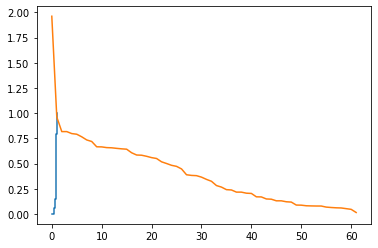

In [65]:
plt.plot(tpr,fpr,t)

In [66]:
from sklearn.metrics import auc,roc_auc_score

In [67]:
auc=roc_auc_score(y_test,y_prob1)

In [68]:
auc

0.8704874835309618

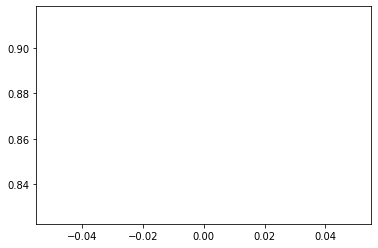

In [69]:
plt.plot(auc)